In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("aerofit_treadmill.csv")

# 1. Defining Problem Statement and Analysing basic metrics
The goal of the the project is to provide the product analysis of aerofit products . We will find the characteristics of the target audience for each type of treadmill offered by the company and collect many insights to provide few recommendations.
We will follow the following steps-
1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [3]:
data.shape

(180, 9)

In [4]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table-

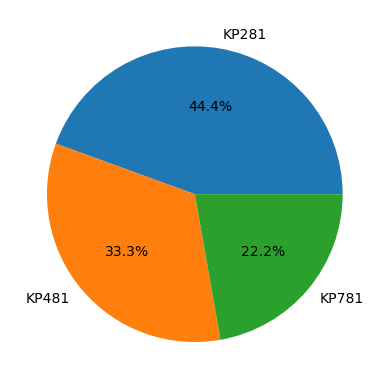

In [73]:
sizes = data['Product'].value_counts(normalize  = True)
labels = data['Product'].value_counts(normalize  = True).index
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.show()

#### Insight - KP281 is the most sold product then comes KP481 .The least sold produCt is KP781 as it is also most expensive one.

<AxesSubplot:xlabel='Age_Bins', ylabel='Product'>

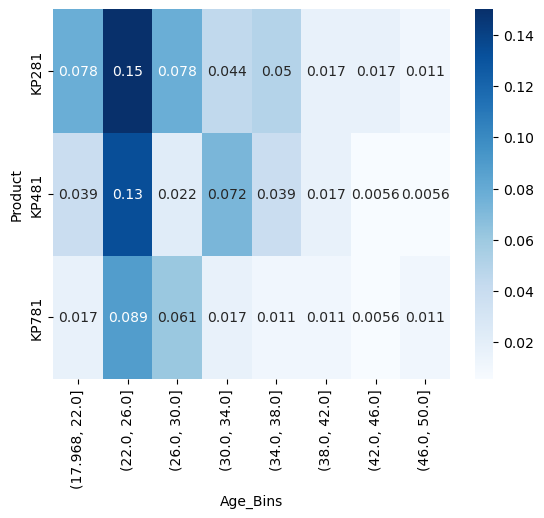

In [74]:
pd.crosstab(data['Product'],data['Age'],normalize = True)
data['Age_Bins'] =pd.cut(data['Age'],8)
data['Age_Bins'].value_counts()
sns.heatmap(pd.crosstab(data['Product'],data['Age_Bins'],normalize = True),cmap = 'Blues',annot =True)

####  INSIGHT-Most of the customers are from age group - 22 to 26 .

<AxesSubplot:xlabel='Income_Bins', ylabel='Product'>

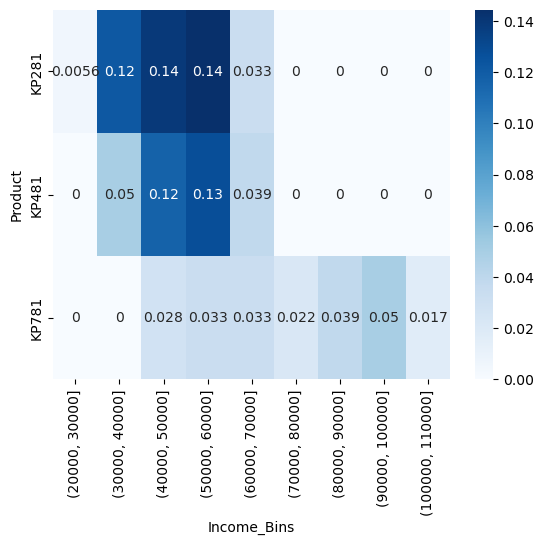

In [75]:
pd.crosstab(data['Product'],data['Income'],normalize = True)
data['Income_Bins'] =pd.cut(data['Income'],bins=[20000,30000,40000,50000,60000,70000,80000,90000,100000,110000])
sns.heatmap(pd.crosstab(data['Product'],data['Income_Bins'],normalize = True),cmap = 'Blues',annot =True)

#### INSIGHTS - 
          1. Customers above 70000 income are only buying KP781.
          2. Most of the customers have income between 40000 to 60000.
          3. Customers having salary lesss than 40000 are not buying KP781
          4. KP281 is most purchased by customers havin salary between 40000 to 60000.
          5. KP481 is most purchased by customers havin salary between 50000 to 60000.
          6. KP781 is most purchased by customers havin salary between 90000 to 100000.

<AxesSubplot:xlabel='Education', ylabel='Product'>

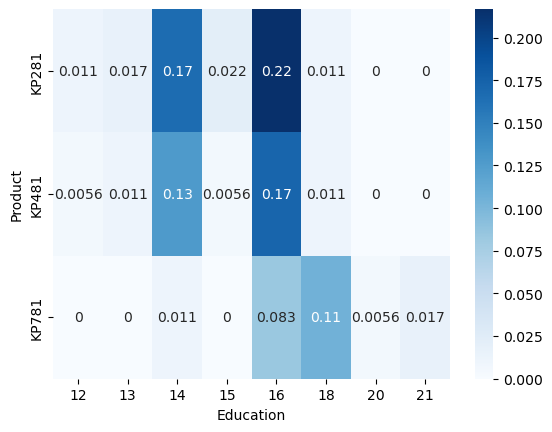

In [76]:
sns.heatmap(pd.crosstab(data['Product'],data['Education'],normalize = True),cmap = 'Blues',annot =True)

#### INSIGHTS-
       1. Customers who have done 14 and 16 years of edication are most likely to buy the products.
       2. Customers having education more than 18 years of education are more likely to buy KP781 product,

<AxesSubplot:xlabel='Fitness', ylabel='Product'>

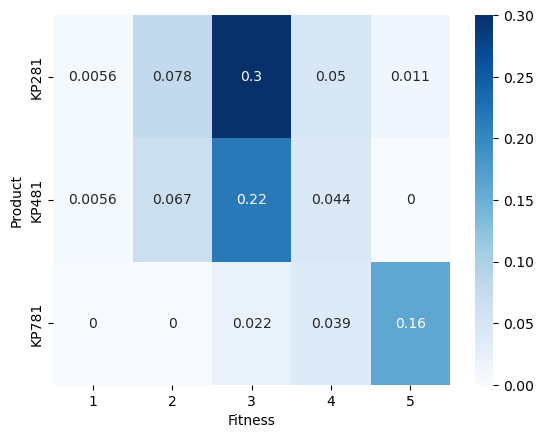

In [10]:
sns.heatmap(pd.crosstab(data['Product'],data['Fitness'],normalize = True),cmap = 'Blues',annot =True)

#### INSIGHTS-
          1. Most of the customers have fitness level 3.
          2. Customeres who have fitness level 5 have only purchased K9781.
  

<AxesSubplot:xlabel='Gender', ylabel='Product'>

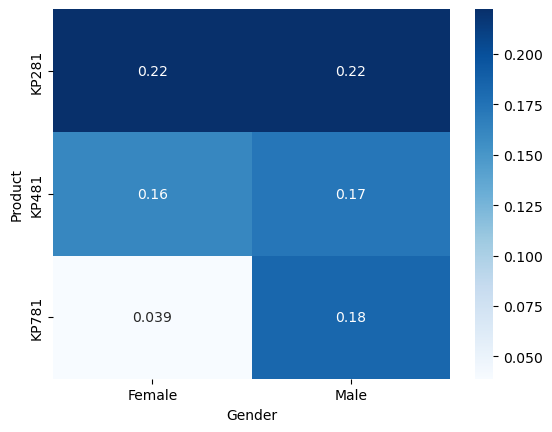

In [11]:
sns.heatmap(pd.crosstab(data['Product'],data['Gender'],normalize = True),cmap = 'Blues',annot =True)

#### INSIGHTS-
            1. The chance of buying KP281 and KP482 is almost equal for both male and female.
            2. The chance of buying KP781 is much higher for male.

<AxesSubplot:xlabel='MaritalStatus', ylabel='Product'>

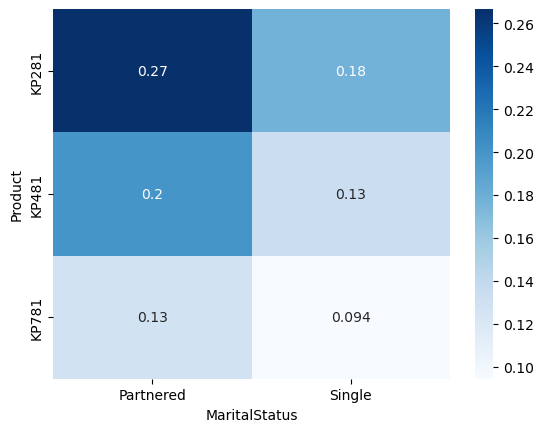

In [12]:
sns.heatmap(pd.crosstab(data['Product'],data['MaritalStatus'],normalize = True),cmap = 'Blues',annot =True)

#### INSIGHTS-
       1. The chance of Partnered customers is much greater than that of Single.

# Conditional probability for each category

In [4]:
# functions for calculating conditional probability of each product and ploting them by a heatmap
def probability(data,col):
    unique_values =  data[col].unique()
    for i in unique_values:
        if i == unique_values[0]:
            temp_data =  pd.DataFrame({i:data.loc[data[col]==i]['Product'].value_counts(normalize = True)})
        else:
            temp_data[i]=pd.DataFrame({i:data.loc[data[col]==i]['Product'].value_counts(normalize = True)})
    return temp_data
def conditional_probability_plot(data,col):
    return sns.heatmap(probability(data,col),cmap='Blues',annot = True)


,14,15,12,13,16,18,20,21
KP281,0.545455,0.8,0.666667,0.6,0.458824,0.086957,NaN,NaN
KP481,0.418182,0.2,0.333333,0.4,0.364706,0.086957,NaN,NaN
KP781,0.036364,NaN,NaN,NaN,0.176471,0.826087,1.0,1.0


<AxesSubplot:>

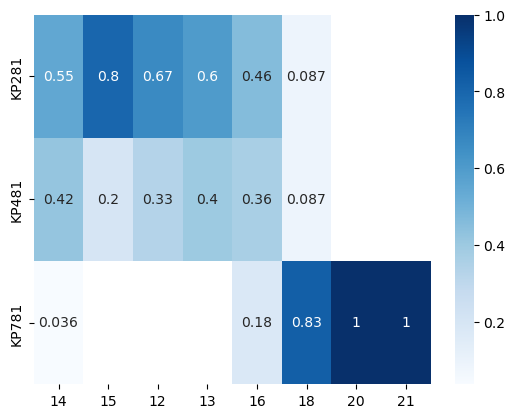

In [26]:
conditional_probability_plot(data,'Education')

#### INSIGHTS-
         1. The customers having education greater than 17 have only chance of buying KP781.
         2. The customers having education less than 16 have no chance of buying KP781.

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Income_Bins
0,KP281,18,Male,14,Single,3,4,29562,112,"(17.968, 22.0]",NaN
1,KP281,19,Male,15,Single,2,3,31836,75,"(17.968, 22.0]","(30000.0, 40000.0]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(17.968, 22.0]","(30000.0, 40000.0]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(17.968, 22.0]","(30000.0, 40000.0]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(17.968, 22.0]","(30000.0, 40000.0]"


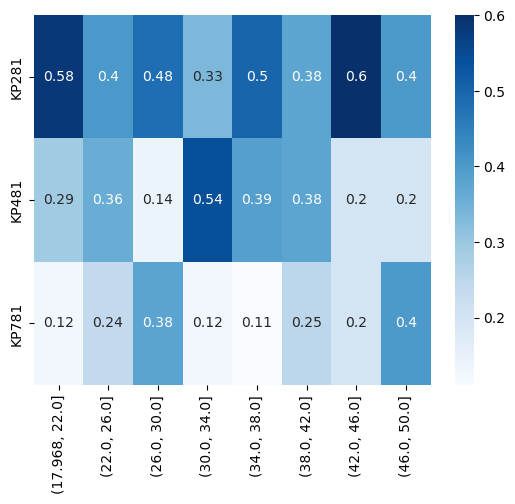

In [30]:
conditional_probability_plot(data,'Age_Bins')

<AxesSubplot:>

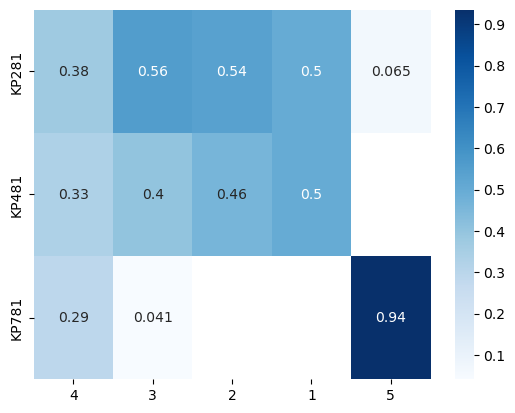

In [34]:
conditional_probability_plot(data,'Fitness')

#### INSIGHTS-
          1. Customers having Fitness level less than 3 have no chance of buying KP781.
          2. Customers having Fitness level equal to 5 have most of the chances to buy KP781.

<AxesSubplot:>

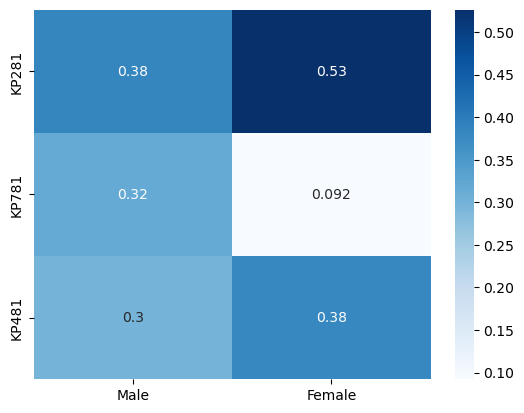

In [36]:
conditional_probability_plot(data,'Gender')

#### INSIGHTS-
        1. Feamales have very less chance of buying KP781.
        2. Males have almost equal chances of buying all the three products.

<AxesSubplot:>

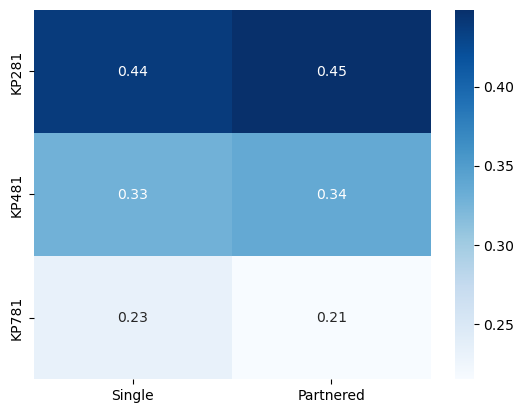

In [5]:
conditional_probability_plot(data,'MaritalStatus')

#### INSIGHTS-
     1. Both Single and Patnered have more chances of buying KP281.

# 2.Non-Graphical Analysis: Value counts and unique attributes

In [41]:
data['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [42]:
data['Age'].value_counts(normalize=True).iloc[:5]*100

25    13.888889
23    10.000000
24     6.666667
26     6.666667
28     5.000000
Name: Age, dtype: float64

In [43]:
data['Education'].value_counts(normalize=True).iloc[:5]*100

16    47.222222
14    30.555556
18    12.777778
15     2.777778
13     2.777778
Name: Education, dtype: float64

In [44]:
data.loc[data['Gender']=='Male']['MaritalStatus'].value_counts(normalize = True)*100

Partnered    58.653846
Single       41.346154
Name: MaritalStatus, dtype: float64

In [45]:
pd.DataFrame({'count':data['Gender'].value_counts(),'Percentage':np.round(data['Gender'].value_counts(normalize = True)*100,2)})

,count,Percentage
Male,104,57.78
Female,76,42.22


In [46]:
pd.DataFrame({'count':data['MaritalStatus'].value_counts(),'Percentage':np.round(data['MaritalStatus'].value_counts(normalize = True)*100,2)})

,count,Percentage
Partnered,107,59.44
Single,73,40.56


# 3.Visual Analysis - Univariate & Bivariate 

## For continuous variable(s): Distplot, countplot, histogram for univariate analysis-

In [47]:
data_KP281 = data.loc[data['Product']=="KP281"]
data_KP481 = data.loc[data['Product']=="KP481"]
data_KP781 = data.loc[data['Product']=="KP781"]

<AxesSubplot:xlabel='Product', ylabel='count'>

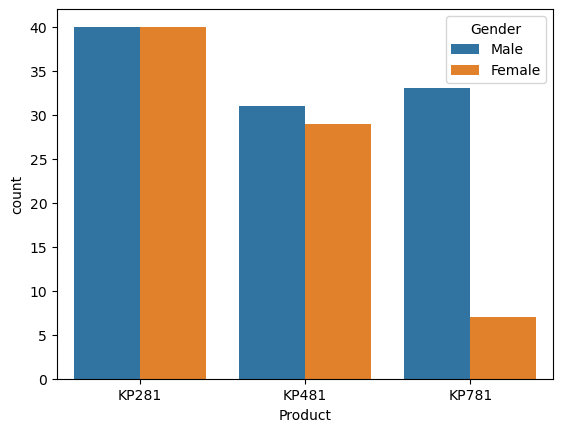

In [6]:
sns.countplot(data= data,x = 'Product',hue='Gender')
# More males are buying the expensinve produxts as compared to females.

#### INSIGHTS-
         1. As we move from KP281 to KP481 TO KP781 more males are buying the product as compared to female.
             Which is completely visible in the Plot.

<AxesSubplot:xlabel='Product', ylabel='count'>

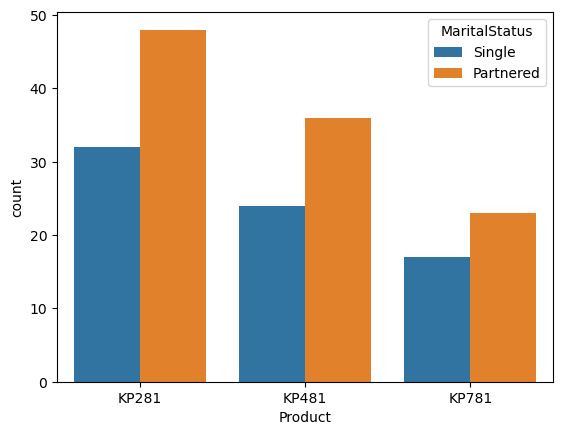

In [49]:
sns.countplot(data= data,x = 'Product',hue='MaritalStatus')

# For categorical variable(s): Boxplot

<AxesSubplot:xlabel='Product', ylabel='Education'>

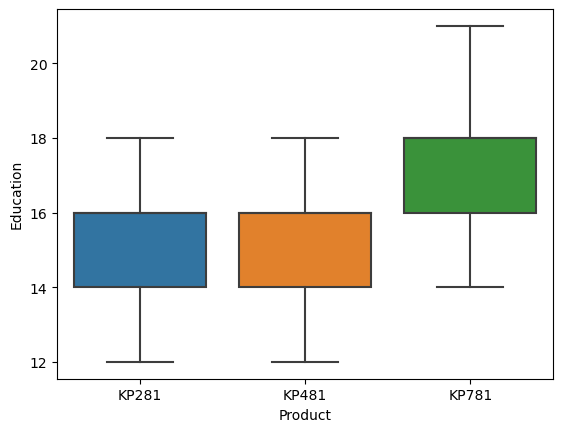

In [52]:
sns.boxplot(data = data , x='Product',y="Education")

#### INSIGHTS-
        Complely visible from the graph that the customer who is buying KP781 is having greater education.

<AxesSubplot:xlabel='Product', ylabel='Usage'>

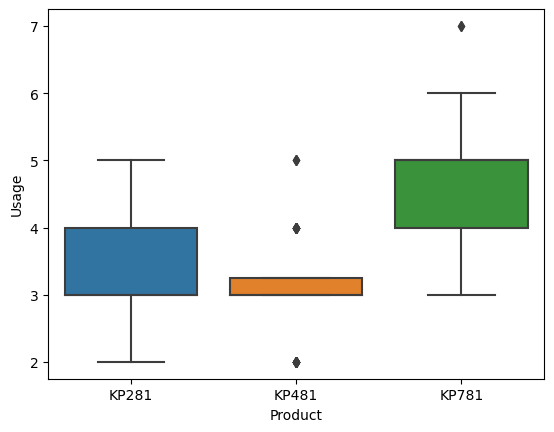

In [7]:
sns.boxplot(data = data , x='Product',y="Usage")

#### INSIGHTS-
     Customeres who are buying KP781 are inspired to Use the product more time in week.

<AxesSubplot:xlabel='Product', ylabel='Miles'>

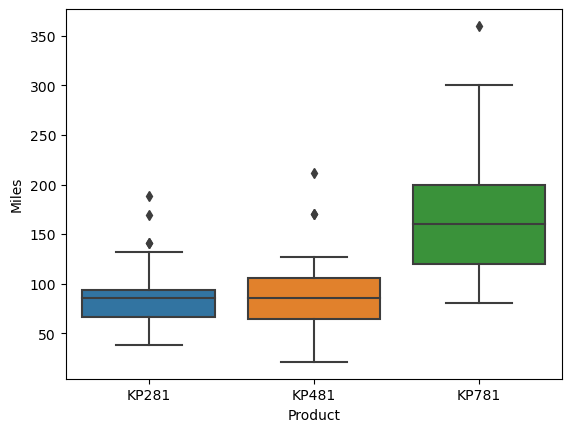

In [54]:
sns.boxplot(data = data , x='Product',y="Miles")

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

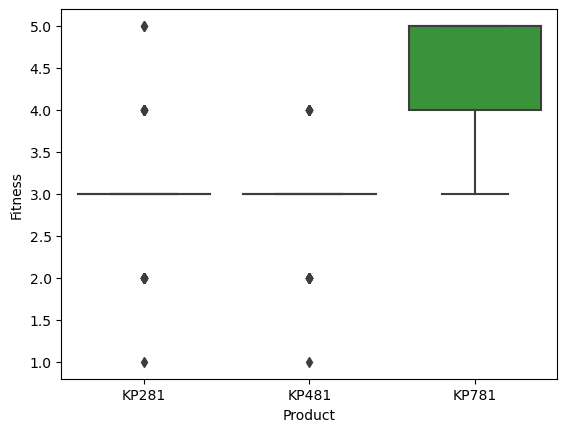

In [55]:
sns.boxplot(data = data , x='Product',y="Fitness")

<AxesSubplot:xlabel='Product', ylabel='Age'>

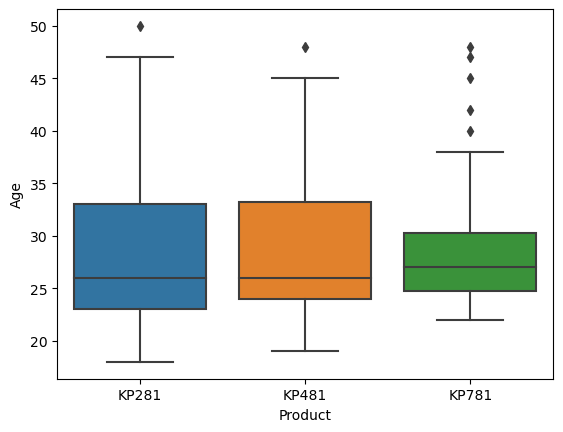

In [56]:
sns.boxplot(data = data , x='Product',y="Age")

<AxesSubplot:xlabel='Product', ylabel='Income'>

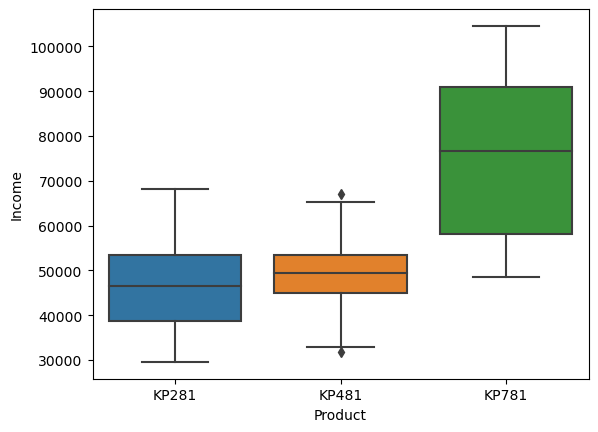

In [57]:
sns.boxplot(data = data, y= 'Income',x = 'Product')

# For correlation: Heatmaps, Pairplots

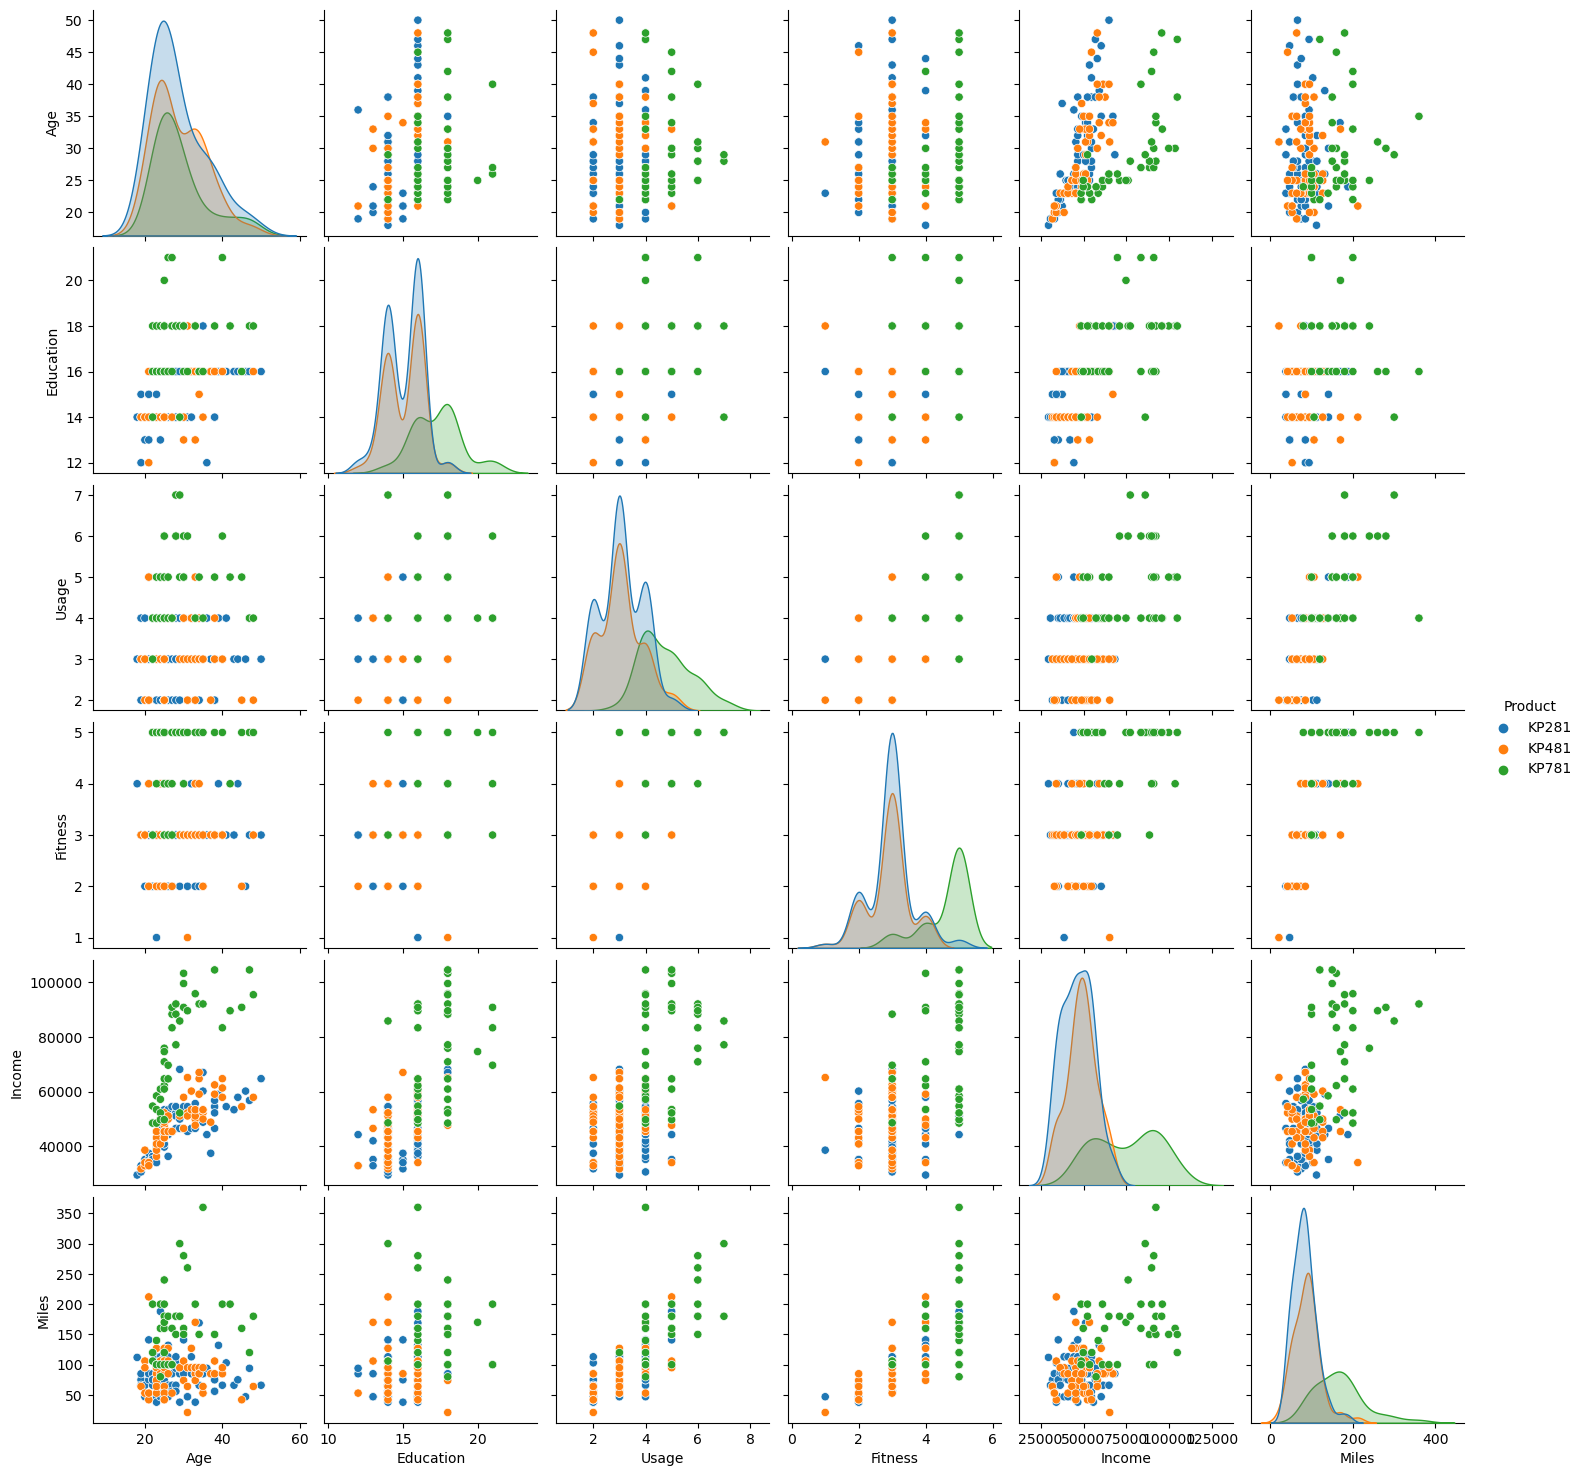

In [59]:
sns.pairplot(data = data ,hue='Product')

<AxesSubplot:>

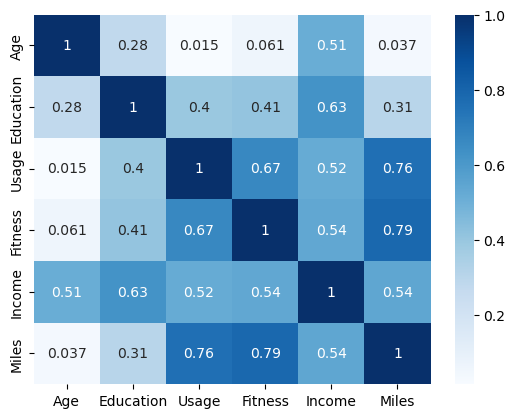

In [60]:
sns.heatmap(data.corr(),cmap = 'Blues',annot=True)

#### INSIGHTS-
        1.All of the categories are positively related .
        2.Miles , fitness and Usage are very positively related to each other.

# 4.Missing Value & Outlier Detection 

In [61]:
stats =  data.describe()
stats.loc['mean']-stats.loc['50%']
# Difference between mean and median

Age             2.788889
Education      -0.427778
Usage           0.455556
Fitness         0.311111
Income       3123.077778
Miles           9.194444
dtype: float64

In [62]:
# funcition for calculating outliers.
def calculate_outliers(stats,col):
    IQR = stats[col].loc['75%']-stats[col].loc['25%']
    outliers = data.loc[data[col]> (stats[col].loc['75%']+ (1.5*IQR))]
    return outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Income_Bins
78,KP281,47,Male,16,Partnered,4,3,56850,94,"(46.0, 50.0]","(50000, 60000]"
79,KP281,50,Female,16,Partnered,3,3,64809,66,"(46.0, 50.0]","(60000, 70000]"
139,KP481,48,Male,16,Partnered,2,3,57987,64,"(46.0, 50.0]","(50000, 60000]"
178,KP781,47,Male,18,Partnered,4,5,104581,120,"(46.0, 50.0]","(100000, 110000]"
179,KP781,48,Male,18,Partnered,4,5,95508,180,"(46.0, 50.0]","(90000, 100000]"


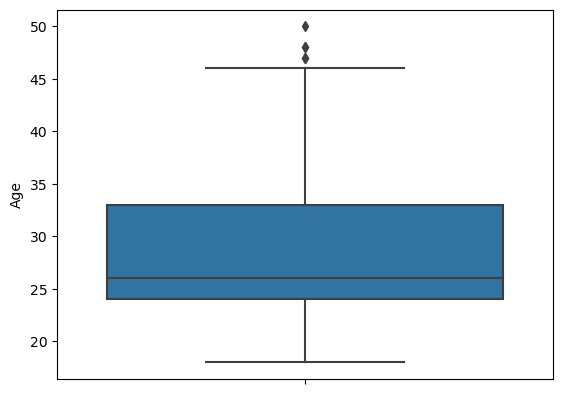

In [63]:
sns.boxplot(data = data, y ='Age') # There are just three outlieres in the age of the customers
calculate_outliers(stats,'Age')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Income_Bins
156,KP781,25,Male,20,Partnered,4,5,74701,170,"(22.0, 26.0]","(70000, 80000]"
157,KP781,26,Female,21,Single,4,3,69721,100,"(22.0, 26.0]","(60000, 70000]"
161,KP781,27,Male,21,Partnered,4,4,90886,100,"(26.0, 30.0]","(90000, 100000]"
175,KP781,40,Male,21,Single,6,5,83416,200,"(38.0, 42.0]","(80000, 90000]"


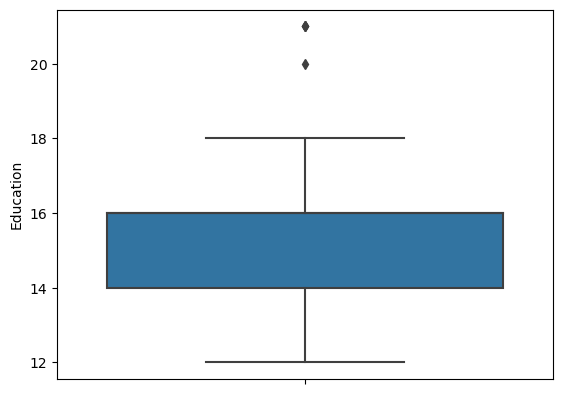

In [64]:
sns.boxplot(data = data, y ='Education') # There are just three outlieres in the age of the customers
calculate_outliers(stats,'Education')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Income_Bins
154,KP781,25,Male,18,Partnered,6,4,70966,180,"(22.0, 26.0]","(70000, 80000]"
155,KP781,25,Male,18,Partnered,6,5,75946,240,"(22.0, 26.0]","(70000, 80000]"
162,KP781,28,Female,18,Partnered,6,5,92131,180,"(26.0, 30.0]","(90000, 100000]"
163,KP781,28,Male,18,Partnered,7,5,77191,180,"(26.0, 30.0]","(70000, 80000]"
164,KP781,28,Male,18,Single,6,5,88396,150,"(26.0, 30.0]","(80000, 90000]"
166,KP781,29,Male,14,Partnered,7,5,85906,300,"(26.0, 30.0]","(80000, 90000]"
167,KP781,30,Female,16,Partnered,6,5,90886,280,"(26.0, 30.0]","(90000, 100000]"
170,KP781,31,Male,16,Partnered,6,5,89641,260,"(30.0, 34.0]","(80000, 90000]"
175,KP781,40,Male,21,Single,6,5,83416,200,"(38.0, 42.0]","(80000, 90000]"


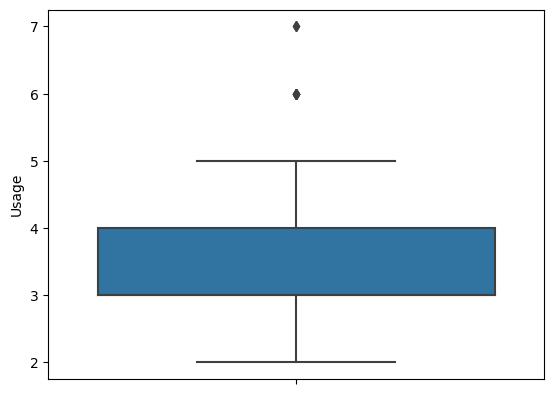

In [65]:
sns.boxplot(data = data, y ='Usage') # There are just three outlieres in the age of the customers
calculate_outliers(stats,'Usage')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Income_Bins
23,KP281,24,Female,16,Partnered,5,5,44343,188,"(22.0, 26.0]","(40000, 50000]"
84,KP481,21,Female,14,Partnered,5,4,34110,212,"(17.968, 22.0]","(30000, 40000]"
142,KP781,22,Male,18,Single,4,5,48556,200,"(17.968, 22.0]","(40000, 50000]"
148,KP781,24,Female,16,Single,5,5,52291,200,"(22.0, 26.0]","(50000, 60000]"
152,KP781,25,Female,18,Partnered,5,5,61006,200,"(22.0, 26.0]","(60000, 70000]"
155,KP781,25,Male,18,Partnered,6,5,75946,240,"(22.0, 26.0]","(70000, 80000]"
166,KP781,29,Male,14,Partnered,7,5,85906,300,"(26.0, 30.0]","(80000, 90000]"
167,KP781,30,Female,16,Partnered,6,5,90886,280,"(26.0, 30.0]","(90000, 100000]"
170,KP781,31,Male,16,Partnered,6,5,89641,260,"(30.0, 34.0]","(80000, 90000]"
171,KP781,33,Female,18,Partnered,4,5,95866,200,"(30.0, 34.0]","(90000, 100000]"


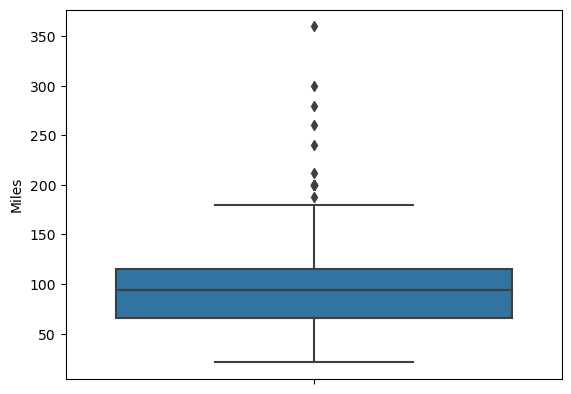

In [66]:
sns.boxplot(data = data, y ='Miles') # Most of the outliers in Miles are using KP781 product.
calculate_outliers(stats,'Miles')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Income_Bins
159,KP781,27,Male,16,Partnered,4,5,83416,160,"(26.0, 30.0]","(80000, 90000]"
160,KP781,27,Male,18,Single,4,3,88396,100,"(26.0, 30.0]","(80000, 90000]"
161,KP781,27,Male,21,Partnered,4,4,90886,100,"(26.0, 30.0]","(90000, 100000]"
162,KP781,28,Female,18,Partnered,6,5,92131,180,"(26.0, 30.0]","(90000, 100000]"
164,KP781,28,Male,18,Single,6,5,88396,150,"(26.0, 30.0]","(80000, 90000]"
166,KP781,29,Male,14,Partnered,7,5,85906,300,"(26.0, 30.0]","(80000, 90000]"
167,KP781,30,Female,16,Partnered,6,5,90886,280,"(26.0, 30.0]","(90000, 100000]"
168,KP781,30,Male,18,Partnered,5,4,103336,160,"(26.0, 30.0]","(100000, 110000]"
169,KP781,30,Male,18,Partnered,5,5,99601,150,"(26.0, 30.0]","(90000, 100000]"
170,KP781,31,Male,16,Partnered,6,5,89641,260,"(30.0, 34.0]","(80000, 90000]"


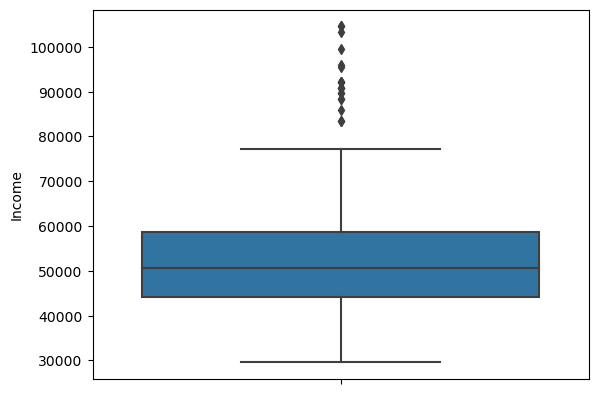

In [67]:
sns.boxplot(data = data, y ='Income') # All custoemrs whose income is outlier in data are buying KP781 product.
calculate_outliers(stats,'Income')

#### INSIGHTS-
    1. Outlier in income are only buying KP781 product.
    

In [68]:
 data.isnull().sum() #There are no null values in the dataset.

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
Age_Bins         0
Income_Bins      0
dtype: int64

1. The KP281 is an entry-level treadmill that sells for 1500.
2. The KP481 is for mid-level runners that sell for 1,750.
3. The KP781 treadmill is having advanced features that sell for 2,500.

# 5. Recommedatioins.

### Product recommedation based on insights       
       1. Aerofit should recommend KP781 to customers- 
             (i) Fitness- 5
             (ii) Income - greater than 70000
             (iii) Education - More than 17 years.
             (iv) Gender - Male is more likely to buy this product.
       2. Aerofit should recommend  KP481 to customers-
             (i) Age-  22 to 26 and 30 to 34
             (ii) Income - 40000 to 70000
             (iii) Education - 14 and 16
       3. Aerofit should recommend KP281 to customers-
             (i) Age-   22 to 26 .
             (ii) Gender - Feamale customer have 50% chance that she will buy this product.
             (iii) Fitness- level 3
             (iv) Marital Status - Partnered

### Other recommedations-
      1. A customer who want to use the product more than 5 times in a weak have more chances that he or she will buy KP782. Therefore quality KP781 should make sure that it could work properly in high usage. 
      
    
             